In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import madmom
import mir_eval
from modules.analysis_funcs import aubio_peakpicker_do, aubio_postprocessing, merging_module
from modules.energy_based import simple_energy_onsets
from modules.vis import passage_extractor, onset_visualizer
from analyze_detection import evaluate

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

madmom.features.onsets.CNNOnsetProcessor()

In [2]:
from datasets import Dataset
ds0 = Dataset("initslurtest")
ds1 = Dataset("slurtest_add_1")
#ds_test = Dataset("slurtest_test")

audio_fnames = ds0.get_audio_paths() + ds1.get_audio_paths() 
#audio_fnames = ds_test.get_audio_paths()[1:]
label_fnames = ds0.get_annotation_paths() + ds1.get_annotation_paths()
#label_fnames = ds_test.get_annotation_paths()[1:]
audios = [madmom.audio.signal.load_wave_file(filename)[0] for filename in audio_fnames]
sample_rates = [madmom.audio.signal.load_wave_file(filename)[1] for filename in audio_fnames]
onset_schedules = [np.loadtxt(label_fname, usecols=0) for label_fname in label_fnames]
audio_lengths = [len(audio)/sr for audio, sr in zip(audios, sample_rates)]

/usr/local/lib/python3.9/site-packages/madmom/audio/signal.py:457: UserWarning: Deprecated as of version 0.16. Please use madmom.io.audio.load_wave_file instead. Will be removed in version 0.18.
  warnings.warn('Deprecated as of version 0.16. Please use madmom.io.audio.'
/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)


In [3]:
TOL = 0.025
THRES = 0.7
MIN_IOI = 0.1
bock = madmom.features.onsets.CNNOnsetProcessor()
pp = madmom.features.onsets.OnsetPeakPickingProcessor(threshold=THRES, combine=MIN_IOI)

In [11]:
# Vary breakpoints
bps = [0.01,0.5]

In [18]:
60.41*sample_rates[28]/441

6575.238095238095

In [12]:
fs = []
rs = []
ps = []

for breakpoint in bps:
    CD_list = []
    FN_list = []
    FP_list = []
    print("Breakpoint: ", breakpoint)
    for a, (fname, audio, onsets, sr, length) in enumerate(zip(audio_fnames, audios, onset_schedules, sample_rates, audio_lengths)):
        print(a, fname)
        
        act_fn = bock(audio)
        peaks = pp(act_fn)
        hard_true, soft_true = merging_module(peaks, onsets, tol_sec=0.05)

        sig = madmom.audio.signal.Signal(fname, dtype=float)
        energy = madmom.audio.signal.energy(sig)
        hard_pred, soft_pred = simple_energy_onsets(
            file=fname, energy_thres=breakpoint*energy/length, fps=sr/441
        )
        [CD,FN,FP,doubles,merged] = evaluate(onsets, hard_pred, tol_sec=0.025)
        CD_list.append(CD)
        FN_list.append(FN)
        FP_list.append(FP)
    print("Total F: ", np.sum(CD_list)/(np.sum(CD_list)+.5*(np.sum(FP_list) + np.sum(FN_list))))
    print("Total P: ", np.sum(CD_list)/(np.sum(CD_list)+np.sum(FP_list)))
    print("Total R: ", np.sum(CD_list)/(np.sum(CD_list)+np.sum(FN_list)))

Breakpoint:  0.01
0 datasets/initslurtest_vn/initslurtest_vn_wav/slurtest01.wav
1 datasets/initslurtest_vn/initslurtest_vn_wav/slurtest02.wav
2 datasets/initslurtest_vn/initslurtest_vn_wav/slurtest03.wav
3 datasets/initslurtest_vn/initslurtest_vn_wav/slurtest04.wav
4 datasets/initslurtest_vn/initslurtest_vn_wav/slurtest05.wav
5 datasets/initslurtest_vn/initslurtest_vn_wav/slurtest06.wav
6 datasets/initslurtest_vn/initslurtest_vn_wav/slurtest07.wav
7 datasets/initslurtest_vn/initslurtest_vn_wav/slurtest08.wav
8 datasets/initslurtest_vn/initslurtest_vn_wav/slurtest09.wav
9 datasets/initslurtest_vn/initslurtest_vn_wav/slurtest10.wav
10 datasets/initslurtest_vn/initslurtest_vn_wav/slurtest11.wav
11 datasets/initslurtest_vn/initslurtest_vn_wav/slurtest12.wav
12 datasets/initslurtest_vn/initslurtest_vn_wav/slurtest13.wav


/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)
/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)


13 datasets/initslurtest_vn/initslurtest_vn_wav/slurtest14.wav


/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)
/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)


14 datasets/initslurtest_vn/initslurtest_vn_wav/slurtest15.wav


/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)
/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)


15 datasets/initslurtest_vn/initslurtest_vn_wav/slurtest16.wav


/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)
/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)


16 datasets/initslurtest_vn/initslurtest_vn_wav/slurtest17.wav


/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)
/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)


17 datasets/initslurtest_vn/initslurtest_vn_wav/slurtest18.wav


/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)
/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)


18 datasets/initslurtest_vn/initslurtest_vn_wav/slurtest19.wav


/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)
/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)


19 datasets/slurtest_add/slurtest_add_audio/stormhatten_IR2.wav


/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)
/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)


20 datasets/slurtest_add/slurtest_add_audio/slurtest02_IR1.wav


/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)
/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)


21 datasets/slurtest_add/slurtest_add_audio/slurtest01_IR2.wav


/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)
/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)


22 datasets/slurtest_add/slurtest_add_audio/slurtest03_FK1.wav


/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)
/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)


23 datasets/slurtest_add/slurtest_add_audio/6xtpsg_220319.wav


/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)
/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)


24 datasets/slurtest_add/slurtest_add_audio/slurtest04_IR2.wav


/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)
/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)


25 datasets/slurtest_add/slurtest_add_audio/melodyvib_220319.wav


/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)
/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)


26 datasets/slurtest_add/slurtest_add_audio/slurtest09_IR2.wav


/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)
/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)


27 datasets/slurtest_add/slurtest_add_audio/janissa_IR2.wav


/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)
/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)


28 datasets/slurtest_add/slurtest_add_audio/6xtpsg_220306.wav


/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)
/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)
/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)


29 datasets/slurtest_add/slurtest_add_audio/slurtest01_FK1.wav
30 datasets/slurtest_add/slurtest_add_audio/slurtest04_FK1.wav


/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)
/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)


31 datasets/slurtest_add/slurtest_add_audio/slurtest01_IR1.wav


/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)
/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)


32 datasets/slurtest_add/slurtest_add_audio/63an_start_220306.wav


/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)
/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)
/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)


33 datasets/slurtest_add/slurtest_add_audio/slurtest08_FK1.wav
34 datasets/slurtest_add/slurtest_add_audio/slurtest03_IR1.wav


/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)
/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)


35 datasets/slurtest_add/slurtest_add_audio/stormhatten_IR1.wav


/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)
/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)


Total F:  0.6890591879993478
Total P:  0.7857939754555597
Total R:  0.6135307781649245
Breakpoint:  0.5
0 datasets/initslurtest_vn/initslurtest_vn_wav/slurtest01.wav
1 datasets/initslurtest_vn/initslurtest_vn_wav/slurtest02.wav
2 datasets/initslurtest_vn/initslurtest_vn_wav/slurtest03.wav
3 datasets/initslurtest_vn/initslurtest_vn_wav/slurtest04.wav
4 datasets/initslurtest_vn/initslurtest_vn_wav/slurtest05.wav
5 datasets/initslurtest_vn/initslurtest_vn_wav/slurtest06.wav
6 datasets/initslurtest_vn/initslurtest_vn_wav/slurtest07.wav
7 datasets/initslurtest_vn/initslurtest_vn_wav/slurtest08.wav
8 datasets/initslurtest_vn/initslurtest_vn_wav/slurtest09.wav
9 datasets/initslurtest_vn/initslurtest_vn_wav/slurtest10.wav
10 datasets/initslurtest_vn/initslurtest_vn_wav/slurtest11.wav
11 datasets/initslurtest_vn/initslurtest_vn_wav/slurtest12.wav
12 datasets/initslurtest_vn/initslurtest_vn_wav/slurtest13.wav


/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)
/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)


13 datasets/initslurtest_vn/initslurtest_vn_wav/slurtest14.wav


/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)
/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)


14 datasets/initslurtest_vn/initslurtest_vn_wav/slurtest15.wav


/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)
/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)


15 datasets/initslurtest_vn/initslurtest_vn_wav/slurtest16.wav


/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)
/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)


16 datasets/initslurtest_vn/initslurtest_vn_wav/slurtest17.wav


/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)
/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)


17 datasets/initslurtest_vn/initslurtest_vn_wav/slurtest18.wav


/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)
/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)


18 datasets/initslurtest_vn/initslurtest_vn_wav/slurtest19.wav


/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)
/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)


19 datasets/slurtest_add/slurtest_add_audio/stormhatten_IR2.wav


/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)
/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)


20 datasets/slurtest_add/slurtest_add_audio/slurtest02_IR1.wav


/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)
/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)


21 datasets/slurtest_add/slurtest_add_audio/slurtest01_IR2.wav


/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)
/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)


22 datasets/slurtest_add/slurtest_add_audio/slurtest03_FK1.wav


/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)
/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)


23 datasets/slurtest_add/slurtest_add_audio/6xtpsg_220319.wav


/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)
/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)


24 datasets/slurtest_add/slurtest_add_audio/slurtest04_IR2.wav


/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)
/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)


25 datasets/slurtest_add/slurtest_add_audio/melodyvib_220319.wav


/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)
/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)


26 datasets/slurtest_add/slurtest_add_audio/slurtest09_IR2.wav


/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)
/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)


27 datasets/slurtest_add/slurtest_add_audio/janissa_IR2.wav


/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)
/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)


28 datasets/slurtest_add/slurtest_add_audio/6xtpsg_220306.wav


/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)
/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)
/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)


29 datasets/slurtest_add/slurtest_add_audio/slurtest01_FK1.wav
30 datasets/slurtest_add/slurtest_add_audio/slurtest04_FK1.wav


/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)
/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)


31 datasets/slurtest_add/slurtest_add_audio/slurtest01_IR1.wav


/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)
/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)


32 datasets/slurtest_add/slurtest_add_audio/63an_start_220306.wav


/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)
/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)
/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)


33 datasets/slurtest_add/slurtest_add_audio/slurtest08_FK1.wav
34 datasets/slurtest_add/slurtest_add_audio/slurtest03_IR1.wav


/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)
/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)


35 datasets/slurtest_add/slurtest_add_audio/stormhatten_IR1.wav


/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)
/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)


Total F:  0.6713873590348807
Total P:  0.6121472979435677
Total R:  0.743321718931475


In [38]:
["{:.2f}".format(100*np.mean(metrics)) for metrics in [fs, ps, rs]]

['69.93', '64.51', '76.42']

In [ ]:
energy_at_hard_onsets = np.zeros((len(audios)))
energy_at_soft_onsets = np.zeros((len(audios)))
n_hard_onsets = np.zeros((len(audios)))
n_soft_onsets = np.zeros((len(audios)))
for a, (fname, audio, onsets, sr, length) in enumerate(zip(audio_fnames, audios, onset_schedules, sample_rates, audio_lengths)):
    print(a, fname)
    
    act_fn = bock(audio)
    peaks = pp(act_fn)
    hard_onsets, soft_onsets = merging_module(peaks, onsets, tol_sec=0.05)

    sig = madmom.audio.signal.Signal(fname, dtype=float)
    frames = madmom.audio.signal.FramedSignal(signal=sig, frame_size=1024, fps=100)
    
    hard_onsets = hard_onsets[hard_onsets<length-0.1]
    soft_onsets = soft_onsets[soft_onsets<length-0.1]
    energy_at_hard_onsets[a]+=np.sum(frames.energy()[(hard_onsets*100).astype(int)])
    energy_at_soft_onsets[a]+=np.sum(frames.energy()[(soft_onsets*100).astype(int)])
    n_hard_onsets[a]+=len(hard_onsets)
    n_soft_onsets[a]+=len(soft_onsets)
    

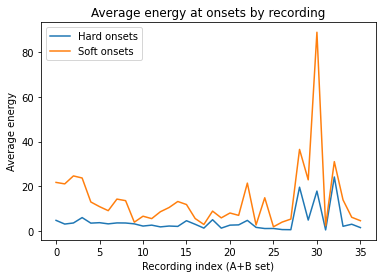

In [37]:
plt.plot(energy_at_hard_onsets/(n_hard_onsets))
plt.plot(energy_at_soft_onsets/(n_soft_onsets))
plt.title("Average energy at onsets by recording")
plt.legend(["Hard onsets", "Soft onsets"])
plt.ylabel("Average energy")
plt.xlabel("Recording index (A+B set)")

In [ ]:
energies = np.zeros(len(audios))
for a, (fname, audio, onsets, sr, length) in enumerate(zip(audio_fnames, audios, onset_schedules, sample_rates, audio_lengths)):
    sig = madmom.audio.signal.Signal(fname, dtype=float)
    energies[a] = madmom.audio.signal.energy(sig)

Text(0.5, 0, 'Onset quality')

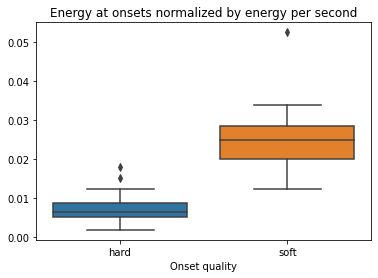

In [38]:
import seaborn as sns
import pandas as pd
onset_energies = pd.DataFrame(
    data={
        'hard':audio_lengths*energy_at_hard_onsets/(energies*n_hard_onsets),
        'soft':audio_lengths*energy_at_soft_onsets/(energies*n_soft_onsets)
    }
)

ax = sns.boxplot(data=onset_energies)
ax.set_title("Energy at onsets normalized by energy per second")
ax.set_xlabel("Onset quality")


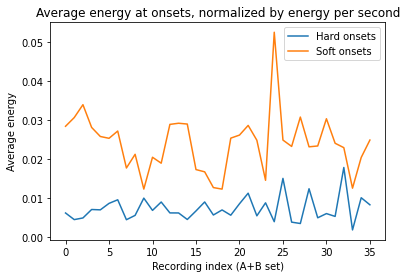

In [41]:
plt.plot(onset_energies["hard"])
plt.plot(onset_energies["soft"])
plt.title("Average energy at onsets, normalized by energy per second")
plt.legend(["Hard onsets", "Soft onsets"])
plt.ylabel("Average energy")
plt.xlabel("Recording index (A+B set)")
#plt.savefig("graphs/onset_energy_norm_graph.png")

In [46]:
np.random.randint(0,9)

8

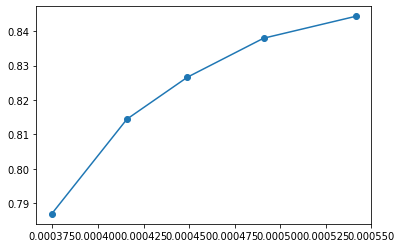

In [7]:
# ROC curve
cds = np.load("results/madmomCNNOnsetProcessor/bock_raw_AB_tuning_cds.npy")
fns = np.load("results/madmomCNNOnsetProcessor/bock_raw_AB_tuning_fns.npy")
fps = np.load("results/madmomCNNOnsetProcessor/bock_raw_AB_tuning_fps.npy")
tns = 133064 - cds - fns - fps
tpr = cds.sum(1)/(cds.sum(1)+fns.sum(1))
fpr = fps.sum(1)/(fps.sum(1)+tns.sum(1))
fscores = cds.sum(1)/(cds.sum(1)+0.5*fps.sum(1)+0.5*fns.sum(1))
rec = cds.sum(1)/(cds.sum(1)+fns.sum(1))
prec = cds.sum(1)/(cds.sum(1)+fps.sum(1))
f_half = 1.25*prec*rec/(0.25*prec+rec)
plt.plot(fpr, tpr, '-o')
plt.show()


In [30]:
print(fscores)
print(rec)
print(prec)
print(f_half)

[0.65019564 0.66497696 0.67456463 0.68082524 0.68201837]
[0.84436702 0.83797909 0.82665505 0.81445993 0.78687573]
[0.52863116 0.55118411 0.56974185 0.58486239 0.60182101]
[0.57136121 0.59168443 0.60750256 0.61980732 0.63152498]


In [3]:

## Visualize onsets
from modules.energy_based import simple_energy_onsets
    

Audio length:  35.66439909297052  s
Segments: [0.0, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0]


/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)


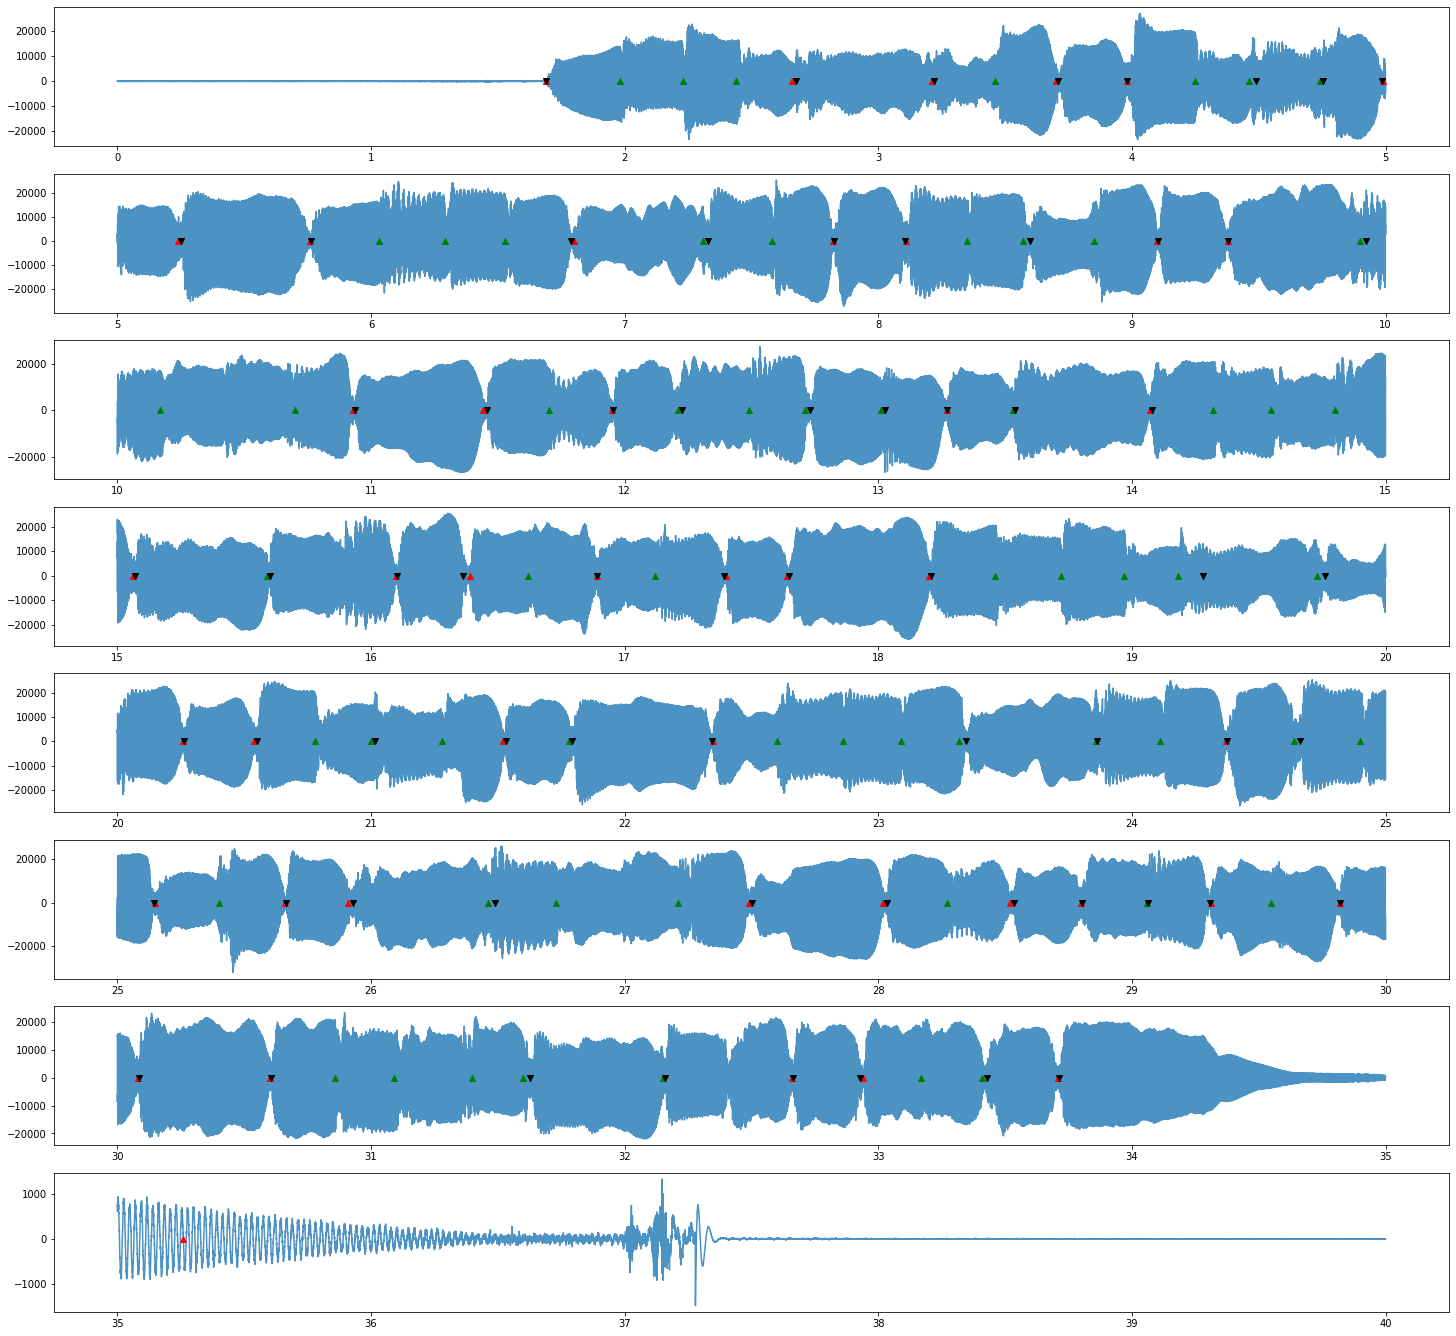

In [11]:

REC_NO = len(audios)-1
R = REC_NO-1
SPP = 5.0 # seconds per plot
print("Audio length: ", audio_lengths[R], " s")
print("Segments:", list(np.arange(0, audio_lengths[R]+SPP, SPP)))
N_PLOTS = int(audio_lengths[R]/SPP)+1

bock = madmom.features.onsets.CNNOnsetProcessor()
pp = madmom.features.onsets.OnsetPeakPickingProcessor(threshold=0.7, combine=0.1)
bock_onsets = pp(bock(audios[R]))
#hard_onsets, soft_onsets = merging_module(, onset_schedules[R], tol_sec=0.05)
hard_onsets, soft_onsets = simple_energy_onsets(
        file=audio_fnames[R], base_onsets=bock_onsets, energy_thres=20.0)

fig, axs = plt.subplots(N_PLOTS, 1, figsize=(25,N_PLOTS*3))
passages = passage_extractor(
    audios[R], 
    [
        onset_schedules[R],
        hard_onsets,
        soft_onsets
    ], 
    list(np.arange(0, audio_lengths[R]+SPP, SPP)), 
    sr=sample_rates[R]
)
for passage, ax in zip(passages, axs):
    onset_visualizer(passage=passage, ax=ax, alpha=0.8)

In [184]:
audio_fnames[7]

'datasets/initslurtest_vn/initslurtest_vn_wav/slurtest08.wav'